<a href="https://colab.research.google.com/github/kouliki/celebal_task6/blob/main/Celebal_task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000
mean,3.664456,120.713528,69.035809,20.518568,80.370027,31.925862,0.472367,33.027851,0.343501
std,3.122575,32.016806,19.246222,15.917043,115.902944,7.902198,0.332027,11.734582,0.475192
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,128.750000,36.475000,0.626750,40.000000,1.000000
max,12.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.groupby('Outcome').mean()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.200000,109.907071,68.121212,19.640404,68.981818,30.274141,0.429978,31.032323
1,4.552124,141.366795,70.783784,22.196911,102.135135,35.082625,0.553382,36.841699


In [7]:
data['Outcome'].value_counts()

Outcome
0    495
1    259
Name: count, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

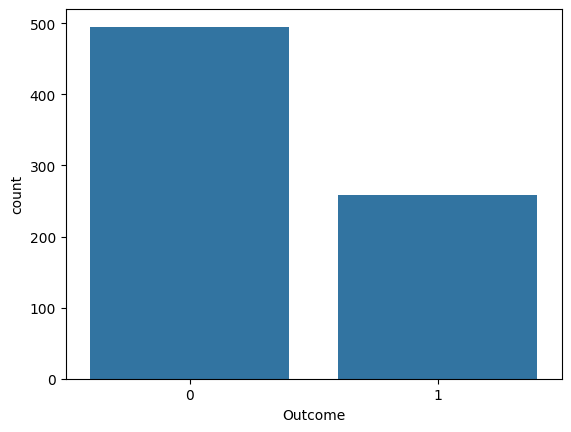

In [9]:
sns.countplot(x='Outcome',data=data)

<ipython-input-10-d903cc4f950e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Pregnancies'])


<Axes: >

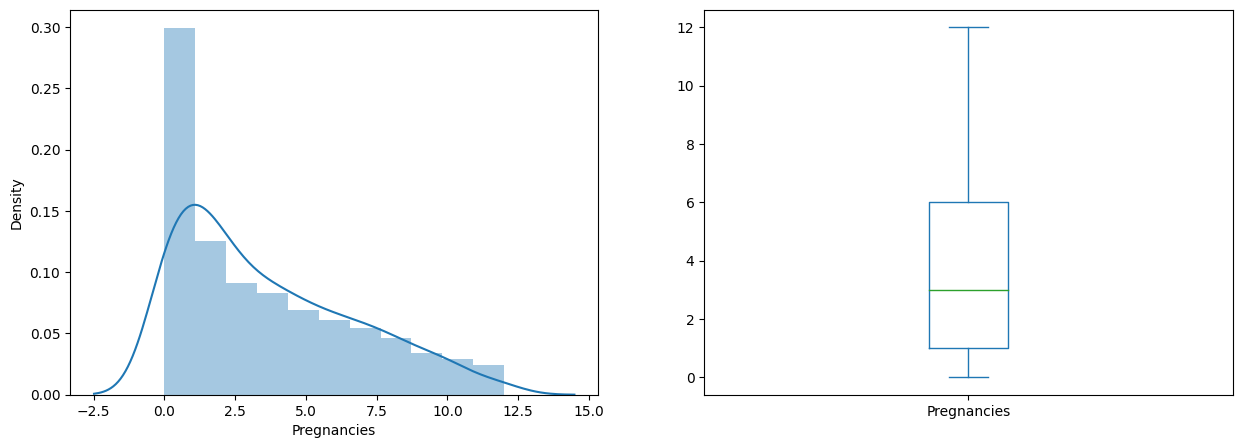

In [10]:
plt.figure(2)
plt.subplot(121)
sns.distplot(data['Pregnancies'])
plt.subplot(122)
data['Pregnancies'].plot.box(figsize=(15,5))

In [11]:
#sns.pairplot(data)

<Axes: >

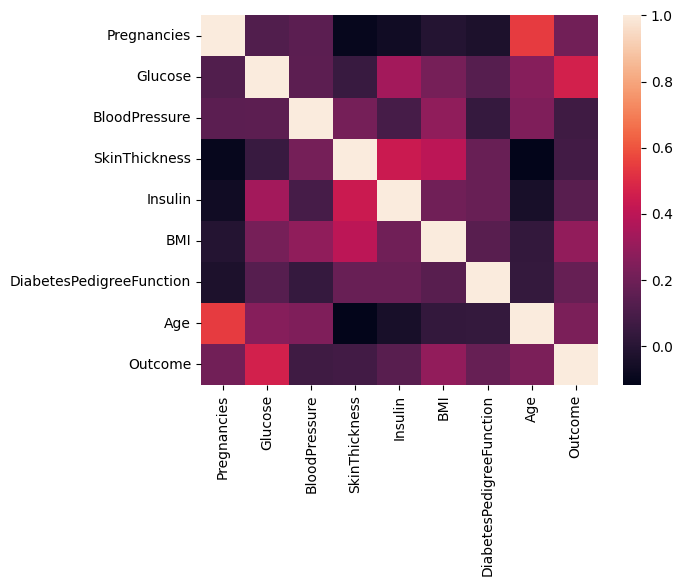

In [12]:
corr_matrix=data.corr()
sns.heatmap(corr_matrix)

In [13]:
x=data.drop(columns='Outcome',axis=1)
y=data['Outcome']

In [14]:
from sklearn.model_selection import train_test_split


In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lg=LogisticRegression()

In [18]:
lg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
l_pred=lg.predict(x_test)

In [20]:
l_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0])

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(y_test,l_pred)

0.8013245033112583

In [23]:
!pip install anvil-uplink

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.9/95.9 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 4.1 MB/s eta 0:00:00


In [24]:
import anvil.server

In [25]:
anvil.server.connect('server_RJBZ5VM57CAHEZW64JBH66QW-QHJ3VUXZSQ7SOCP2')

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Published" as SERVER


In [26]:
real_pred=lg.predict([[33,33,33,33,33,33,33,33]])
print(type(str(real_pred[0])))

<class 'str'>


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [27]:
@anvil.server.callable
def CHECK(Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age):
  Pregnancies=int(Pregnancies)
  Glucose=int(Glucose)
  BloodPressure=int(BloodPressure)
  SkinThickness=int(SkinThickness)
  Insulin=int(Insulin)
  BMI=int(BMI)
  DiabetesPedigreeFunction=int(DiabetesPedigreeFunction)
  Age=int(Age)
  real_pred=lg.predict([[Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age]])
  print(real_pred[0])
  if str(real_pred[0])=="1":
    return "true"
  else:
    return "false"

In [28]:
anvil.server.wait_forever

<function anvil.server.wait_forever()>

In [29]:
from sklearn.metrics import classification_report,confusion_matrix

In [30]:
print(confusion_matrix(y_test,l_pred))

[[91 14]
 [16 30]]


In [31]:
print(classification_report(y_test,l_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       105
           1       0.68      0.65      0.67        46

    accuracy                           0.80       151
   macro avg       0.77      0.76      0.76       151
weighted avg       0.80      0.80      0.80       151



In [32]:
from sklearn import tree
dt=tree.DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [33]:
pred=dt.predict(x_test)
pred

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(y_test,pred)

0.6754966887417219